Importing libraries

In [388]:
import numpy as np # for making arrays
import pandas as pd # for reading and preporcessing the data
from sklearn.model_selection import train_test_split # to split the data set into training and testing
from sklearn.linear_model import LogisticRegression  # A type of supervised learning algorithms that uses regression to predict a class , same as classification but with numbers instead of
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # to get the accuracy score ,confusion matrix of the model
from sklearn.preprocessing import StandardScaler,LabelEncoder # to encode categories into numbers and to standardizes features
import matplotlib.pyplot as plt # to plot graphs
import seaborn as sns
import joblib


Data Collection and Processing


In [389]:
#loading the data set into a pandas DataFrame
loan_dataSet=pd.read_csv('/LoanPredictionDataset.csv')

In [390]:
#Sample of the data set
loan_dataSet.head() #prints the first 5 rows of the data set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [391]:
#number of rows and cols
loan_dataSet.shape

(614, 13)

In [392]:
#Stats values
loan_dataSet.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [393]:
#number of missing values in each col
loan_dataSet.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [394]:
#Drop the missing values
loan_dataSet=loan_dataSet.dropna()

In [395]:
#number of missing values in each col
loan_dataSet.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [396]:
#Dependent column values
loan_dataSet['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [397]:
# Handle 'Dependents' column (replace '3+' with 3 and convert to integer)
loan_dataSet['Dependents'] = loan_dataSet['Dependents'].replace('3+', 3).astype(int)

In [398]:
#Dependent column values
loan_dataSet['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3,41


In [399]:
# Encode categorical variables
label_encoder = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    loan_dataSet[col] = label_encoder.fit_transform(loan_dataSet[col])

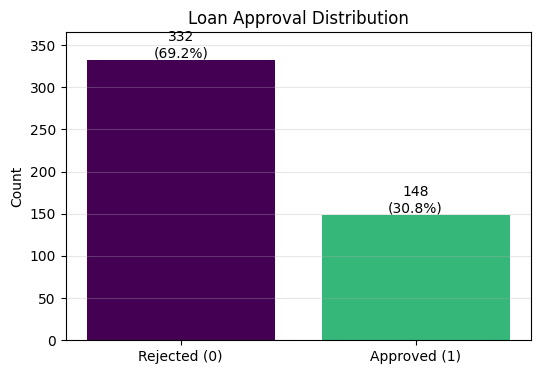

In [400]:
# Get value counts
status_counts = Y.value_counts()
labels = ['Rejected (0)', 'Approved (1)']

plt.figure(figsize=(6, 4))

# Create bar plot
bars = plt.bar(labels, status_counts, color=['#440154', '#35b779'])
# Add count labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}\n({height/len(Y):.1%})',
             ha='center', va='bottom')

plt.title('Loan Approval Distribution')
plt.ylabel('Count')
plt.ylim(0, max(status_counts)*1.1)  # Add 10% headroom

# Optional: Add grid
plt.grid(axis='y', alpha=0.3)

plt.show()

In [414]:
#Drop ID and gender columns (feature exctraction), split the data set into X --> (Features) , Y --> (Lables)
X = loan_dataSet.drop(columns=['Loan_ID','Gender','Loan_Status'])
Y=loan_dataSet['Loan_Status']

Model Training


In [415]:
#Split the data into training and testing (65-35)
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.35,stratify=Y,random_state=20)

In [416]:
#A preprocessing step that is used to standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.decomposition import PCA
# Initialize PCA with desired number of components
pca = PCA(n_components=5)  # Choose the number of components

# Fit PCA on training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)



In [417]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=1000)

Prediction and Evaluation

In [418]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))


Accuracy: 0.8392857142857143
Confusion Matrix:
 [[ 25  27]
 [  0 116]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.48      0.65        52
           1       0.81      1.00      0.90       116

    accuracy                           0.84       168
   macro avg       0.91      0.74      0.77       168
weighted avg       0.87      0.84      0.82       168



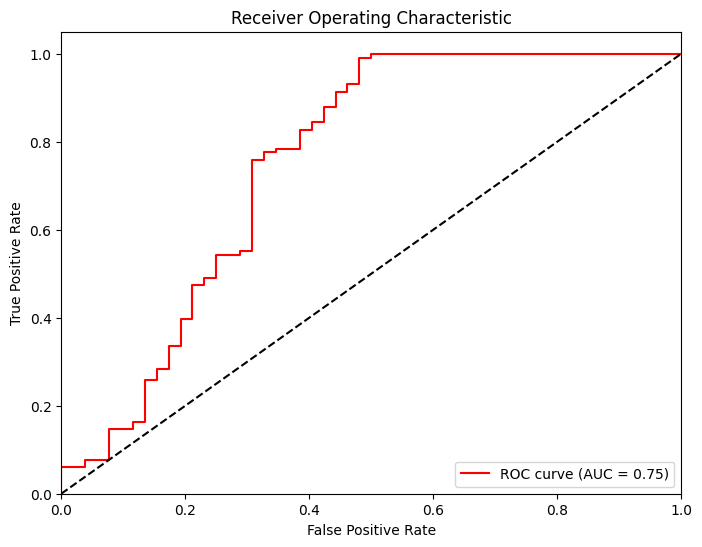

In [419]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='red', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
joblib.dump(model, 'models/logistic_model.pkl')